In [9]:
from utils.Models import RegressionModel

In [10]:
import pandas as pd

df_descriptors = pd.read_csv('sdf_descriptors.csv', index_col=False)
df = pd.read_csv('data/OROP_updated.csv', index_col=False)

df_descriptors=df_descriptors.dropna()

In [11]:
df_descriptors.set_index('system_number', inplace=True)
df_descriptors=df_descriptors.reindex(df['system_number'].values)
df_descriptors.reset_index(inplace=True)
df_descriptors

,system_number,nAcid,nBase,nBridgehead,nH,nN,nCl,nBr,nX,ATS8d,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,PetitjeanIndex,TSRW10,WPath
0,49,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.052444,0.062500,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,37.472182,86.0
1,181,1.0,0.0,0.0,8.0,0.0,0.0,4.0,4.0,137.0,...,0.049981,0.030412,0.025673,0.021650,0.014598,0.003906,0.0,0.444444,65.405606,1870.0
2,52,0.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,...,0.151111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,35.730685,62.0
3,27,0.0,0.0,0.0,9.0,0.0,1.0,0.0,1.0,3.0,...,0.057037,0.036458,0.040408,0.000000,0.000000,0.000000,0.0,0.428571,38.682184,127.0
4,139,0.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0,56.0,...,0.030222,0.018056,0.000163,0.006076,0.008062,0.000000,0.0,0.444444,44.690407,343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,18,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0,...,0.042469,0.034722,0.026939,0.000000,0.000000,0.000000,0.0,0.428571,40.170439,164.0
182,62,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,30.941317,27.0
183,129,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.085556,0.059028,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,37.289972,90.0
184,59,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,30.941317,27.0


In [19]:
new_df=pd.concat([df, df_descriptors], axis=1)
new_df=new_df.dropna()
new_des_df=new_df.drop(columns=['system_number','dG_red', 'Solvent', 'Charge_gn', 'Charge_rd', 'UHF_gn', 'UHF_rd', 'SMILES_1', 'NumAtoms_1'])
new_data=new_df['dG_red']
new_data


0      1.41
1     -1.10
2      1.69
3      1.73
4      1.67
       ... 
181    1.60
182    2.50
183    1.95
184    1.51
185    1.84
Name: dG_red, Length: 175, dtype: float64

Best hyperparameters for SVR: {'C': 10, 'epsilon': 0.1}
Best hyperparameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 5}
Best hyperparameters for RandomForest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best hyperparameters for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best hyperparameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Trained models:
SVR
DecisionTree
RandomForest
GradientBoosting
KNN
Best model: DecisionTree
Metrics: {'MSE': 0.7998538785058377, 'MAE': 0.5308012987012988, 'R2': 0.6696192363500164}


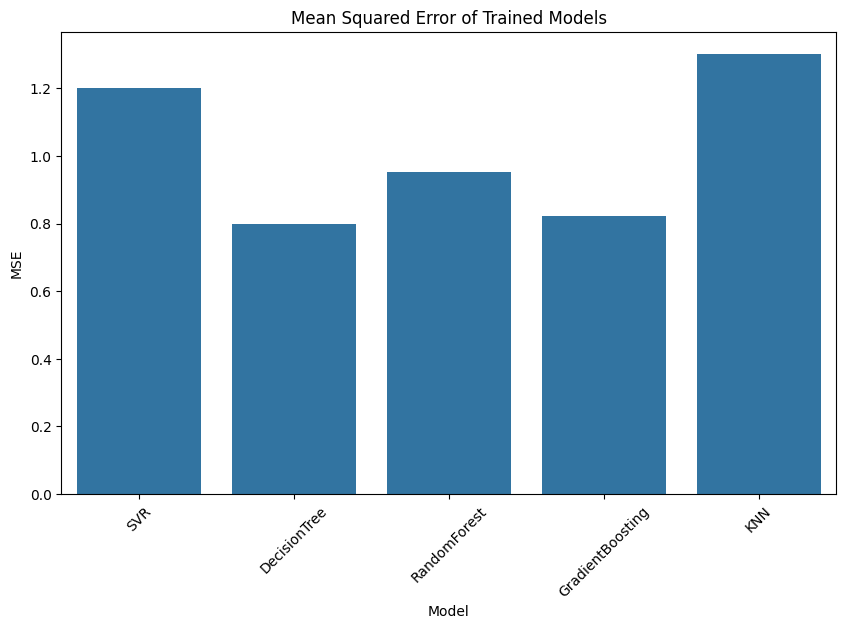

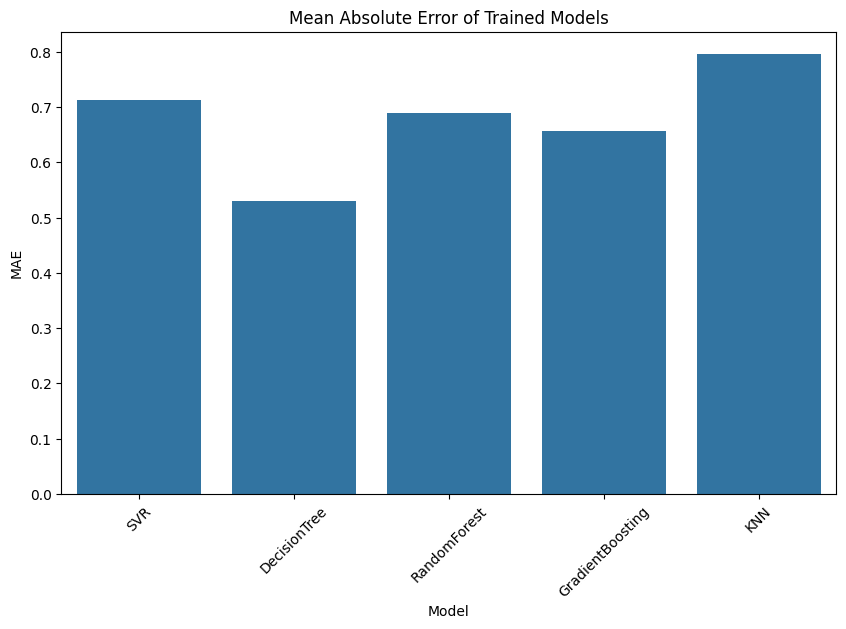

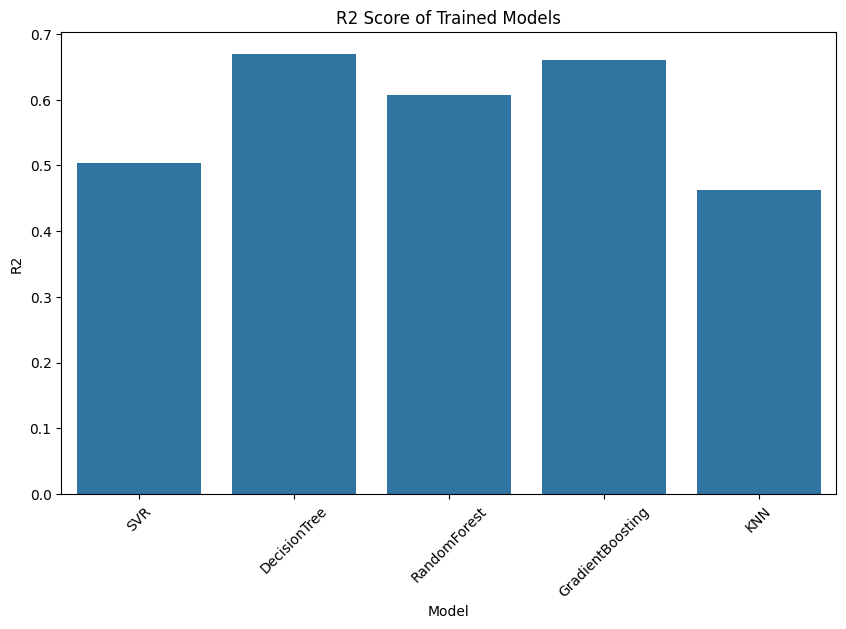

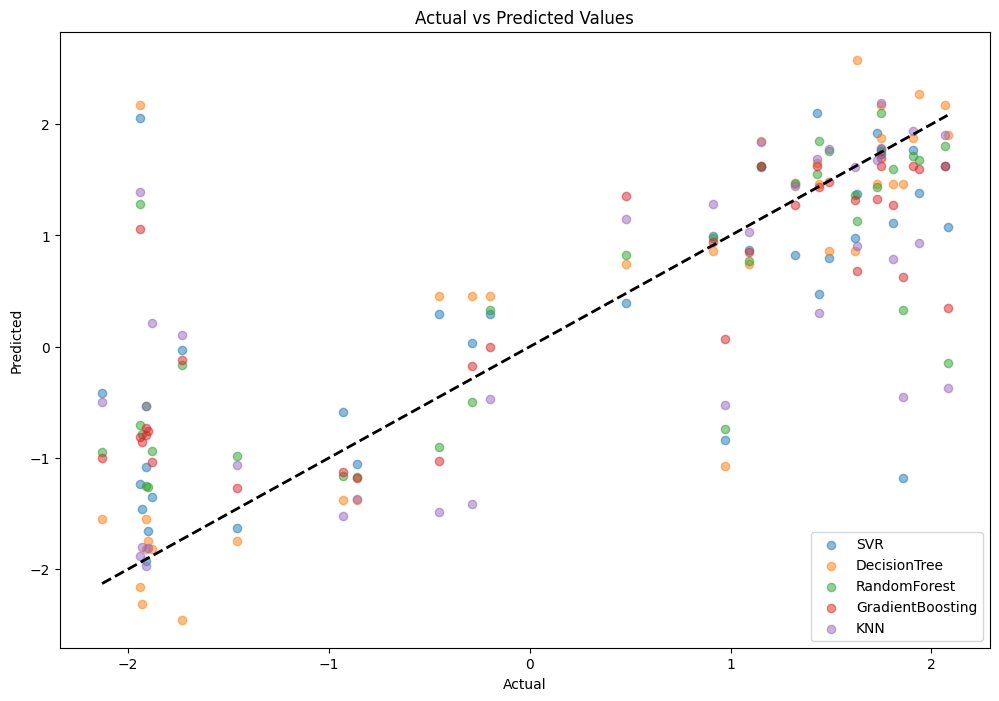

Metrics for all models:
SVR: {'MSE': 1.2007569006065875, 'MAE': 0.7127768033435435, 'R2': 0.5040256821390203}
DecisionTree: {'MSE': 0.7998538785058377, 'MAE': 0.5308012987012988, 'R2': 0.6696192363500164}
RandomForest: {'MSE': 0.9516967825008565, 'MAE': 0.6903420891153481, 'R2': 0.6069003124005349}
GradientBoosting: {'MSE': 0.8218676864296371, 'MAE': 0.6566885362132554, 'R2': 0.6605264021859876}
KNN: {'MSE': 1.301823657142857, 'MAE': 0.7962857142857143, 'R2': 0.4622799169419388}


In [20]:
X = new_des_df  # DataFrame containing descriptors
y = new_data    # Target values to predict

# Create and train the regression model
reg_model = RegressionModel(X, y)
reg_model.run()

# Display metrics for all models
print("Metrics for all models:")
for model_name, metrics in reg_model.metrics.items():
    print(f"{model_name}: {metrics}")